In [44]:
#Import all relevant modules
%matplotlib inline
import numpy as np
import torch
import torchvision.utils as vutils
import os
import matplotlib.pyplot as plt
import argparse

In [45]:
#Import the data in os indpendent manner
home = os.path.expanduser("~")
path_args = [home, 'temp']
base_dir = os.path.join(*path_args)
file_path = os.path.join(base_dir, 'lf_set.h5')

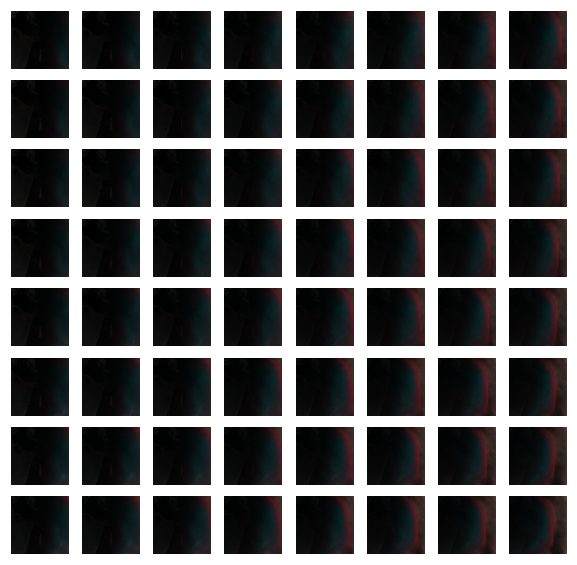

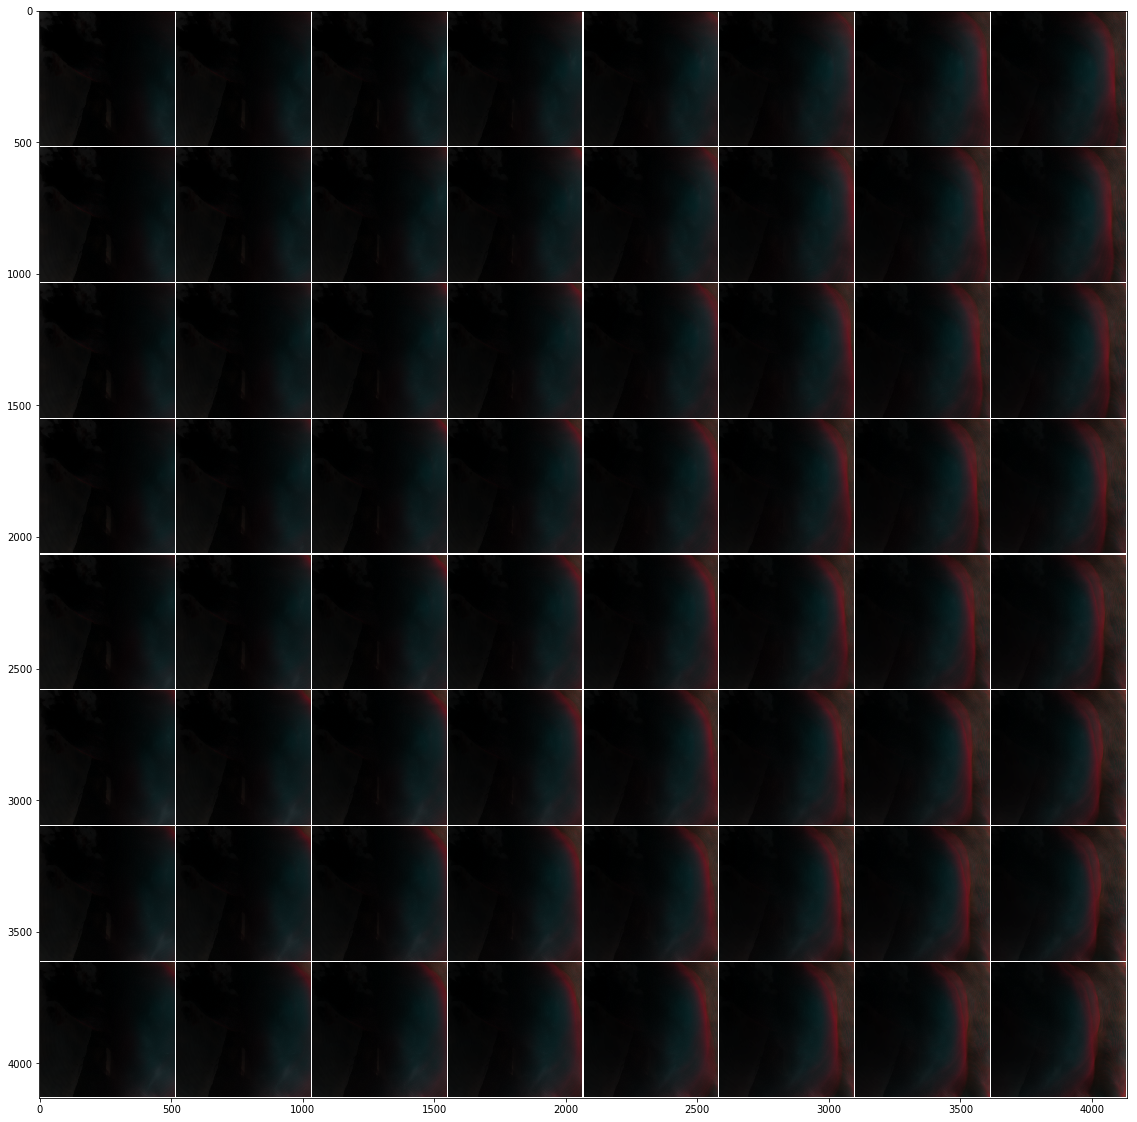

In [46]:
import h5py    
with h5py.File(file_path, mode='r', libver='latest', swmr=True) as h5_file:
    sample = h5_file['train']['colour']['images'][0] 
    
    rows = 8
    cols = 8
    plt.rcParams['figure.figsize'] = [10, 10]
    f, axes = plt.subplots(rows, cols)
    for y, row_axis in enumerate(axes):
        for x, col_axis in enumerate(row_axis):
            image = sample[(y * cols) + x, :, :, :3]
            col_axis.imshow(image)
            col_axis.axis('off')
            col_axis.get_xaxis().set_visible(False)
            col_axis.get_yaxis().set_visible(False)
    plt.show()
    
    images = torch.tensor(sample[:, :, :, :3], dtype=torch.float32).transpose(1, 3).transpose(2, 3)
    output_grid = vutils.make_grid(
            images, 
            nrow=8, range=(0, 255), normalize=True,
            pad_value=1, padding=4)
    
    show(output_grid)
